[*********************100%***********************]  1 of 1 completed
hey 1
(178.30534746550205, 0.586196248828367, 8.336720034545491, 9.061674594465416, -0.04862967602113599, -0.00518595963321261, -0.005185822664778517, 3.769093763916764e-05, 2.1116933527696635, 0.6593561511524262)
self.coef_.values() dict_values([178.30534746550205, 0.586196248828367, 8.336720034545491, 9.061674594465416, -0.04862967602113599, -0.00518595963321261, -0.005185822664778517, 3.769093763916764e-05])


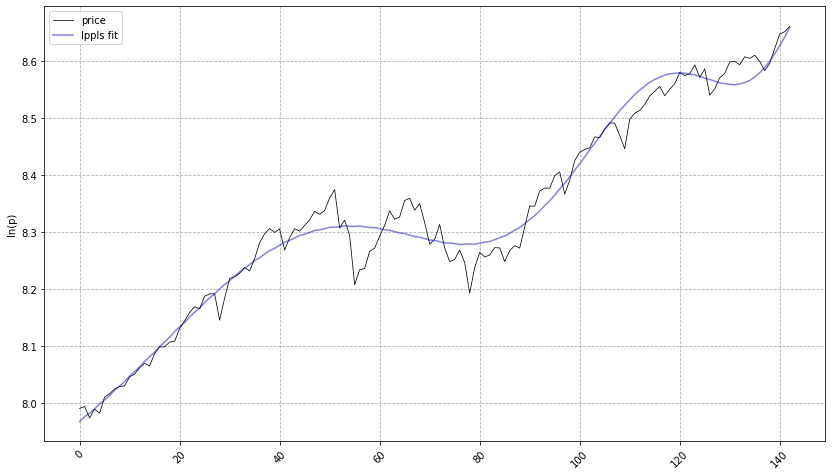

In [1]:
import sys
sys.path.append('../')

from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf

data = yf.download('000001.SS', start='2007-03-12', end='2007-10-10')
data['Date'] = data.index

# Use np.linspace to define time
time = np.linspace(0, len(data['Date']) - 1, len(data['Date']))

# create list of observation data
price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)
print((tc, m, w, a, b, c, c1, c2, O, D))
# visualize the fit
lppls_model.plot_fit()

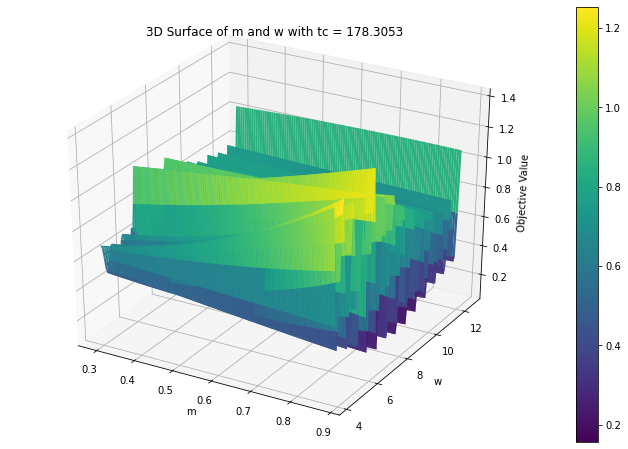

In [2]:
lppls_model.plot_cross_section_3D('m', 'w')

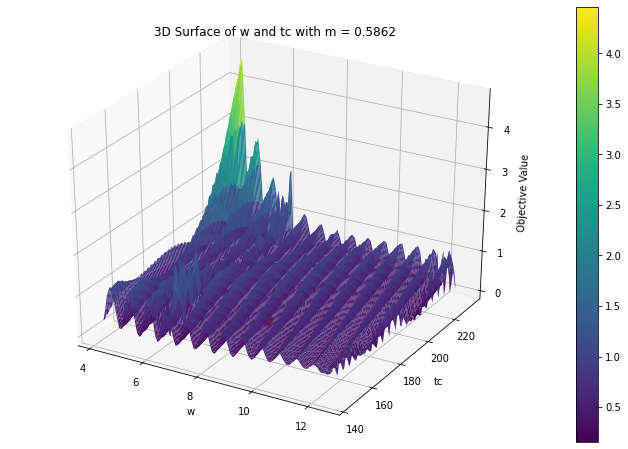

In [3]:
lppls_model.plot_cross_section_3D('w', 'tc')

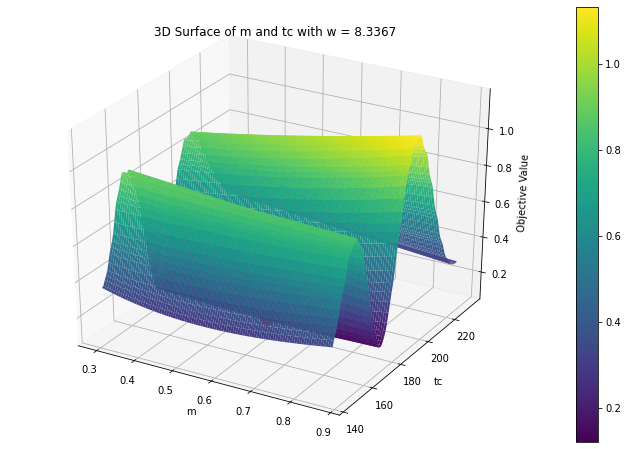

In [4]:
lppls_model.plot_cross_section_3D('m', 'tc')